In [2]:
"""
    TEST MODEL AGAINST TEST DATASET
"""
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from pandas import DataFrame

# -- Load the pre-trained model --
model = keras.models.load_model(os.path.abspath(os.path.join("model", "LSTM_1_model_saved_model")))

# -- Load the test dataset --
test = pd.read_csv(os.path.join("dataset", "test.csv"))

# -- Ensure the new data is preprocessed in the same way as the training data --
scaler = MinMaxScaler()
# X_new = test[['arrival_hour', 'arrival_minute', 'stop_lat', 'stop_lon', 'next_lat', 'next_lon']]
X_new = test[['arrival_hour', 'arrival_minute', 'stop_lat', 'stop_lon', 'next_lat', 'next_lon', 'speed_kmh',
              'segment_max_speed_kmh', 'runtime_sec', 'direction_id', 'distance_m']]
X_new = scaler.fit_transform(X_new)



Shape of X_seq_new: (37, 64, 11)


In [4]:
X_new

array([[1.        , 0.69230769, 0.3145825 , ..., 0.        , 0.        ,
        0.01269771],
       [1.        , 0.73076923, 0.27948996, ..., 0.        , 0.        ,
        0.30105061],
       [1.        , 0.76923077, 0.26447189, ..., 0.        , 0.        ,
        0.34029509],
       ...,
       [0.        , 0.15384615, 0.64890971, ..., 0.        , 1.        ,
        0.17149945],
       [0.        , 0.19230769, 0.74992786, ..., 0.        , 1.        ,
        0.30796456],
       [0.        , 0.23076923, 0.79793622, ..., 0.        , 1.        ,
        0.16786504]])

In [ ]:
# -- Define the sequence length (seq_length) used during training --
seq_length = 64

# -- Generate sequences from the new data --
X_seq_new = []

for i in range(len(X_new) - seq_length + 1):
    sequence = X_new[i:i + seq_length]
    X_seq_new.append(sequence)

X_seq_new = np.array(X_seq_new)
print("Shape of X_seq_new:", X_seq_new.shape)

In [7]:
print(X_seq_new)

[[[1.         0.69230769 0.3145825  ... 0.         0.         0.01269771]
  [1.         0.73076923 0.27948996 ... 0.         0.         0.30105061]
  [1.         0.76923077 0.26447189 ... 0.         0.         0.34029509]
  ...
  [1.         0.73076923 0.27948996 ... 0.         0.         0.30105061]
  [1.         0.76923077 0.26447189 ... 0.         0.         0.34029509]
  [1.         0.80769231 0.239712   ... 0.         0.         0.03482973]]

 [[1.         0.73076923 0.27948996 ... 0.         0.         0.30105061]
  [1.         0.76923077 0.26447189 ... 0.         0.         0.34029509]
  [1.         0.80769231 0.239712   ... 0.         0.         0.03482973]
  ...
  [1.         0.76923077 0.26447189 ... 0.         0.         0.34029509]
  [1.         0.80769231 0.239712   ... 0.         0.         0.03482973]
  [1.         0.84615385 0.20273705 ... 1.         0.         0.5443736 ]]

 [[1.         0.76923077 0.26447189 ... 0.         0.         0.34029509]
  [1.         0.807692

Shape of X_seq_new: (37, 64, 11)
[[ 2.1341488 ]
 [ 3.2655602 ]
 [ 1.1026895 ]
 [ 1.1890337 ]
 [-0.10293506]
 [ 0.8935077 ]
 [ 0.52018434]
 [ 1.271907  ]
 [ 2.471537  ]
 [ 2.3337767 ]
 [ 2.4492085 ]
 [ 2.1190736 ]
 [ 0.5346383 ]
 [ 1.1961385 ]
 [ 2.8512151 ]]
     stop_lat  stop_lon   next_lat  next_lon  arrival_hour  arrival_minute
0   51.154290  7.066125  51.151736  7.055332            19              25
1   51.151736  7.055332  51.150643  7.050905            19              26
2   51.150643  7.050905  51.148841  7.045405            19              27
3   51.148841  7.045405  51.146150  7.029510            19              28
4   51.146150  7.029510  51.142660  7.027789            19              29
5   51.142660  7.027789  51.139561  7.026491            19              31
6   51.139561  7.026491  51.131395  7.025896            19              32
7   51.131395  7.025896  51.127984  7.022263            19              33
8   51.189468  7.373354  51.196664  7.381351             5        

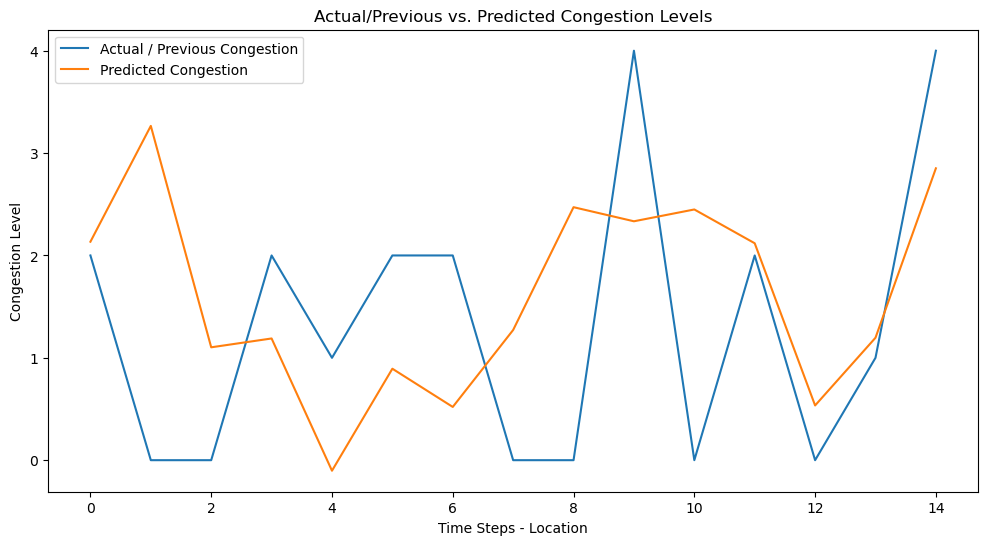

In [1]:
# -- Assuming 'arrival_time' is the column in the 'test' DataFrame representing the time steps --
timestamps = test['arrival_time'].iloc[seq_length - 1:]

# -- Make predictions --
predicted_congestion = model.predict(X_seq_new)
print(predicted_congestion[:15])
# predict = predicted_congestion[:15]
location = test[["stop_lat", "stop_lon", "next_lat", "next_lon", "arrival_hour", "arrival_minute"]][:15]

print(location)
# -- Plot the predicted and actual / previous congestion levels --
plt.figure(figsize=(12, 6))
plt.plot(test['congestion_level'][:15], label="Actual / Previous Congestion")
plt.plot(predicted_congestion[:15], label="Predicted Congestion")
plt.legend()
plt.xlabel("Time Steps - Location")
plt.ylabel("Congestion Level")
plt.title("Actual/Previous vs. Predicted Congestion Levels")
plt.show()